# Tutorial - Adquisición de imágenes y pixeles

Durante la semana hemos los conceptos básicos para cargar y manipular imágenes.
En este tutorial abordaremos los siguientes conceptos:

- Librerías para manipular imágenes en Python (OpenCV, Numpy y Matplotlib)
- Cómo cargar imágenes en Python (escala de grises y RGB)
- Ejemplo sencillo de segmentación de imágenes

# Instalar librerías

## OpenCV

La librería principal que usaremos para trabajar con imágenes se llama OpenCV. Pueden instalar esta librería corriendo el siguiente comando:

In [1]:
!pip install opencv-python 

You should consider upgrading via the '/Users/evillalo/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.


Luego, pueden importar el paquete ```cv2```:

In [2]:
import cv2

Al instalar OpenCV por default se instalan Numpy y Matplotlib.

## NumPy

Las imágenes se suelen cargar como matrices de pixeles, por lo que usaremos NumPy para manipular esas matrices.

## Matplotlib

Si bien usaremos OpenCV para la mayoría nuestros propósitos, la librería Matplotlib también tiene funciones útiles para trabajar con imágenes. Durante este tutorial usaremos Matplotlib principalmente para visualizar las imágenes.

# Cargar imágenes

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Cargando imágenes con Matplotlib

En Matplotlib se pueden cargar imágenes usando ```imread```. Esta función recibe el nombre de un archivo y retorna una matriz de los pixeles de la imágenes.

**Las imágenes a color se cargan en formato RGB**

In [4]:
imagen_plt = plt.imread('manzanas.jpeg')

In [7]:
print("Las dimensiones de la imagen son:", imagen_plt.shape)

Las dimensiones de la imagen son: (664, 1000, 3)


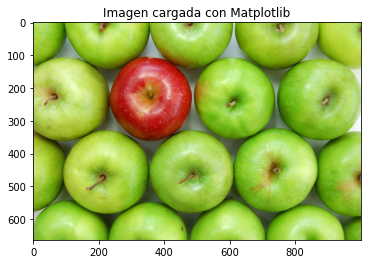

In [8]:
plt.title('Imagen cargada con Matplotlib')
plt.imshow(imagen_plt)

## Cargando imágenes con OpenCV

OpenCV también tiene una función ```imread``` que nos da un poco más de libertad al momento de cargar una imagen. En particular, nos permite cargar imagenes en escala de grises y a color. 

### Cargar imágenes en escala de grises

In [9]:
# Para cargar en escala de grises usamos cv2.IMREAD_GRAYSCALE
imagen_cv2_gray = cv2.imread('manzanas.jpeg', cv2.IMREAD_GRAYSCALE)

In [10]:
print("Las dimensiones de la imagen son:", imagen_cv2_gray.shape)

Las dimensiones de la imagen son: (664, 1000)


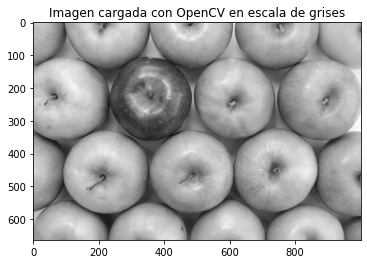

In [11]:
plt.title('Imagen cargada con OpenCV en escala de grises')
plt.imshow(imagen_cv2_gray, cmap='gray') # cmap='gray' es para escala de grises

### Cargar imágenes a color

In [13]:
# Para cargar imágenes a color usamos cv2.IMREAD_COLOR
imagen_cv2_color = cv2.imread('manzanas.jpeg', cv2.IMREAD_COLOR)

In [14]:
print("Las dimensiones de la imagen son:", imagen_cv2_color.shape)

Las dimensiones de la imagen son: (664, 1000, 3)


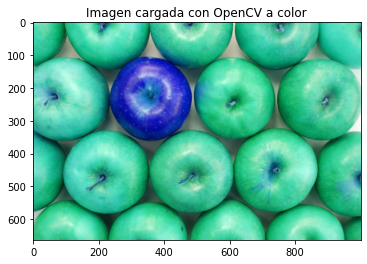

In [15]:
plt.title('Imagen cargada con OpenCV a color')
plt.imshow(imagen_cv2_color)

**Por qué los colores están tan extraños??** 

Esto ocurre porque Matplotlib asume que los datos están en formato RGB (rojo, verde y azul). Sin embargo, OpenCV carga las imágenes en formato BGR (azul, verde y rojo). Para arreglar esto debemos cambiar el orden de los colores en la imagen cargada con OpenCV.

In [17]:
# Esto invierte el orden de la última dimensión de la matriz (es decir, la de los colores)
imagen_cv2_rgb = imagen_cv2_color[:, :, ::-1] 

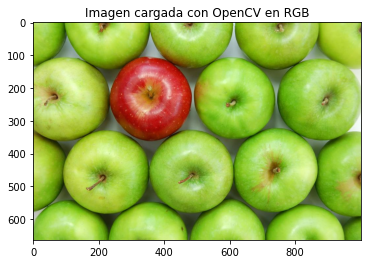

In [18]:
plt.title('Imagen cargada con OpenCV en RGB')
plt.imshow(imagen_cv2_rgb)

Mucho mejor!! Ahora comprobemos que esta es la misma imagen que en Matplotlib

In [19]:
np.array_equal(imagen_plt, imagen_cv2_rgb)

True

# Canales RGB

In [20]:
imagen_rgb = cv2.imread('manzanas.jpeg', cv2.IMREAD_COLOR)[:, :, ::-1] 

canal_r = imagen_rgb[:, :, 0]
canal_g = imagen_rgb[:, :, 1]
canal_b = imagen_rgb[:, :, 2]

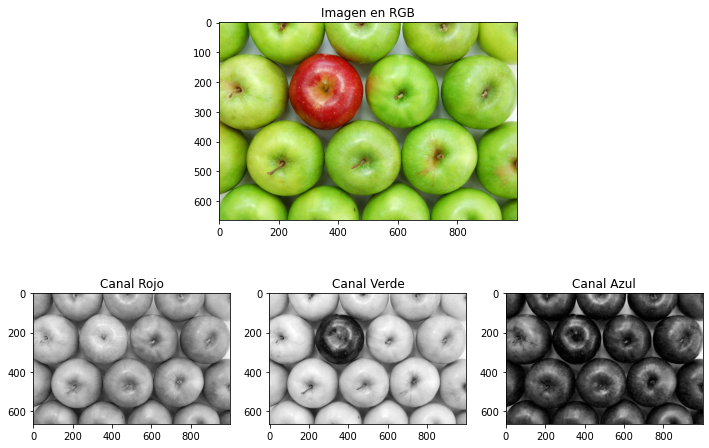

In [21]:
plt.figure(figsize=(12, 8))

# Imagen a color
plt.subplot(2,1,1)
plt.title('Imagen en RGB')
plt.imshow(imagen_cv2_rgb)

# Canal R
X = [ (2,3,4), (2,3,5), (2,3,6) ]


# Imagen a color
plt.subplot(2,3,4)
plt.title('Canal Rojo')
plt.imshow(canal_r, cmap='gray')

# Imagen a color
plt.subplot(2,3,5)
plt.title('Canal Verde')
plt.imshow(canal_g, cmap='gray')

# Imagen a color
plt.subplot(2,3,6)
plt.title('Canal Azul')
plt.imshow(canal_b, cmap='gray')

# Segmentación de imágenes

El proceso de segmentación consiste en separar distintos elementos de una imagen que nos puedan interesar. 

Como ejemplo, veremos si podemos separar la manzana roja de las manzanas verdes.

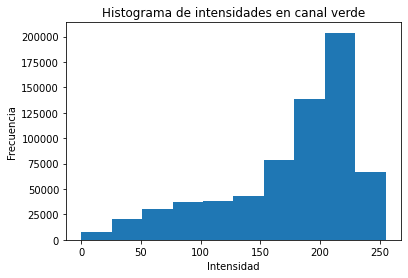

In [22]:
plt.title("Histograma de intensidades en canal verde")
plt.ylabel("Frecuencia")
plt.xlabel("Intensidad")
plt.hist(canal_g.ravel())
plt.show()

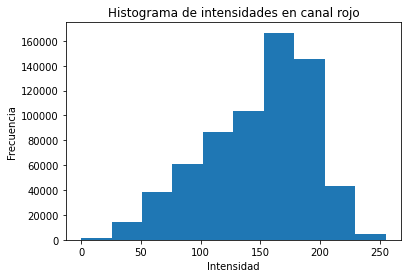

In [23]:
plt.title("Histograma de intensidades en canal rojo")
plt.ylabel("Frecuencia")
plt.xlabel("Intensidad")
plt.hist(canal_r.ravel())
plt.show()

In [24]:
# Primer paso: 
imagen_bin = (canal_g < 150) & (canal_r > 150)

print("Matriz binaria: (Cumple la condición -> True; No la cumple -> False)")
print()
print(imagen_bin)

Matriz binaria: (Cumple la condición -> True; No la cumple -> False)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


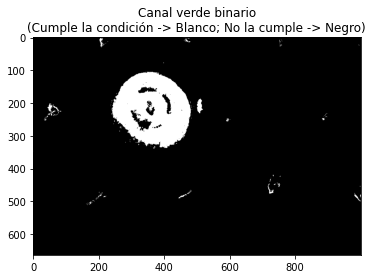

In [25]:
plt.title("Canal verde binario\n(Cumple la condición -> Blanco; No la cumple -> Negro)")
plt.imshow(imagen_bin, cmap='gray')

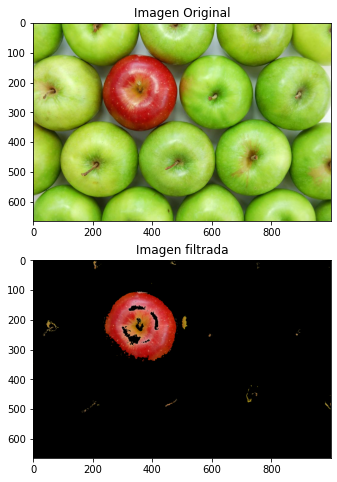

In [27]:
rgb_mask = np.stack([imagen_bin,imagen_bin,imagen_bin], axis=-1)
masked_image = np.multiply(imagen_rgb, rgb_mask)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
axes[0].set_title("Imagen Original")
axes[0].imshow(imagen_rgb)

axes[1].set_title("Imagen filtrada")
axes[1].imshow(masked_image)